# **Capstone Project**

## Machine learning Engineer Nanodegree Program

### Using Machine Learning to classify if a patient has diabetes

Hi my name is **Efraín Pérez** and this is my humble final capstone project for the machine learning nanodegree program!

### **Project Overview**


Three years ago, I was diagnosed with pre-diabetes at 22 years old. It was a big shock for me, because being young you never have thoughts about any kind of disease or illness. But shortly after being diagnosed, I had so much interest and enthusiasm in the field of machine learning and was always wondering, how could I use this knowledge to help people like me and not have the same scenario like me?. So, with this project I have my opportunity!.


Diabetes is in the top 10 causes of death in my country, Panama. So for that, we have to take actions against this disease and prevent any future patients.

## Libraries

We are going to import all the necessary libraries to build our models

First we are going to create a Neuronal network with tensorboard and then a machine learning model with sklearn to compare our prediction results!

List of libraries we are going to use:

* Pandas: Import our dataset
* joblib: Export our scaller
* sklearn: Machine learning models such as Naive Bayes, SVC, Decission Tree
* numpy: Use it to create numpy arrays to our new exported model
* tensorflow & Keras: Our mathematicals libraries to create Neuronal Networks


In [1]:
import pandas as pd

import joblib

import numpy as np
import datetime
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout


Using TensorFlow backend.


In [2]:
# Checking if we are using tensorflow 2.x
tf.__version__

'2.1.3'

## Datasets and Inputs

We are going to use the Diabetes Kaggle dataset to achieve this project https://www.kaggle.com/uciml/pima-indians-diabetes-database. In this dataset all patients here are females at least 21 years old of Pima Indian heritage.
This data has many medical predictors as independent variables and one dependent variable.


### **Variables:**
* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration 2 hours in an oral glucose tolerance test.
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Outcome:** Is diabetic person or not

In [3]:
# Loading our dataset
df = pd.read_csv('diabetes.csv')

In [4]:
# Showing of first 5 rows in our dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Observations

As you can see, we have 8 independient variables (Pregnancies, Glucose, Blood Pressure, Insulin, BMI, Diabetes pedigree Function, Age) and 1 dependient variable (Outcome)


Before splitting our dataset i would like to see if there is a strong correlation between them and plot them!

In [5]:
# Showing a table with correlations
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Sometimes it is very hard to see the correlations between all variables, but we can use matplotlib and seaborn to see a better picture of our variables

In [6]:
# Importing seaborn and pyplot

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Get nicer graphs!
sns.set()

We are going to see a big picture of our variables to get a visual understanding

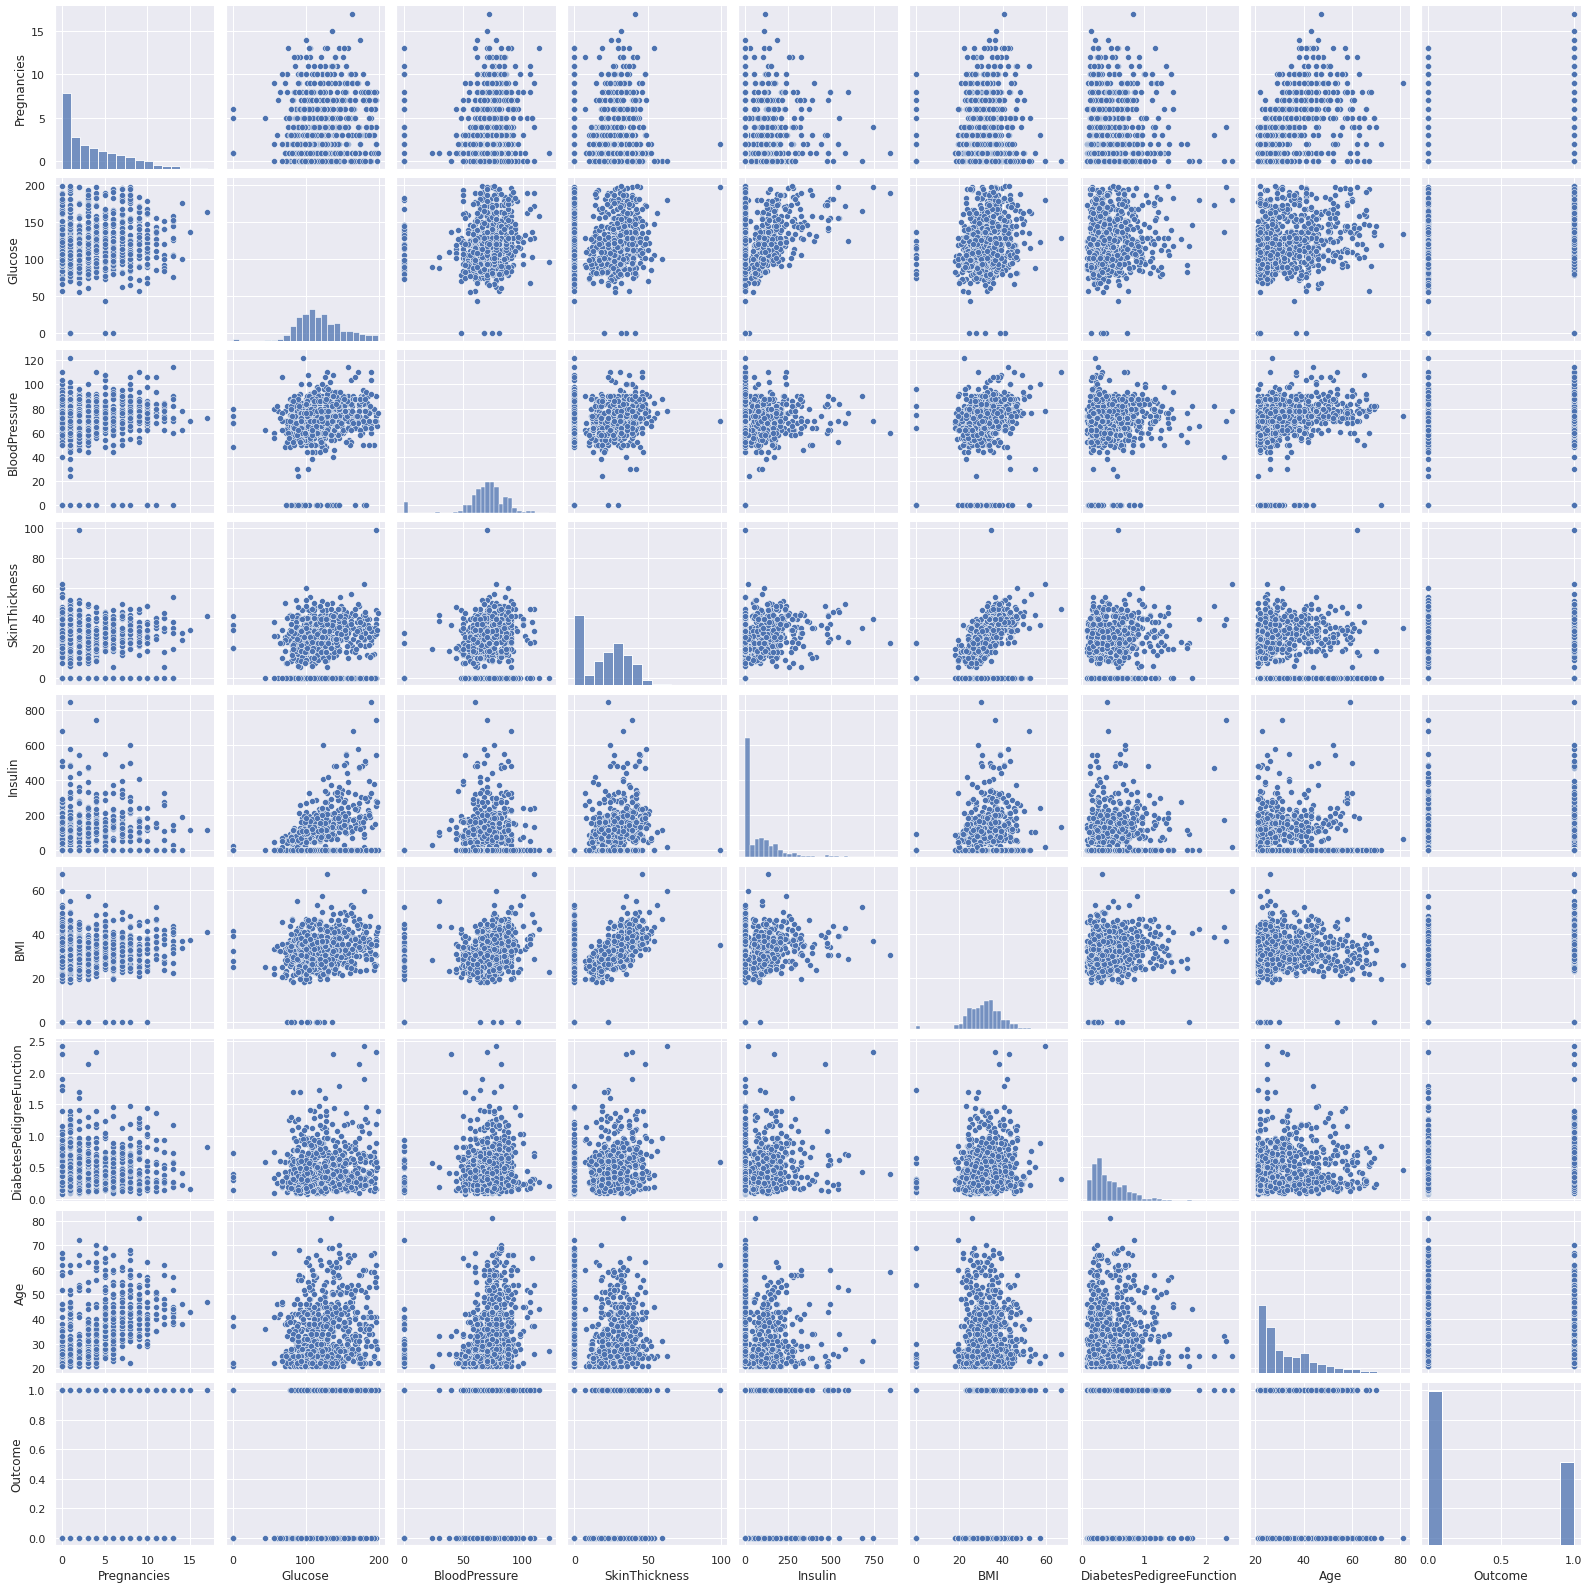

In [8]:
sns.pairplot(df, height=2.5)

Better!. With this, we can understand visually if two variable has a strong correlations or not.

As you can see The Insuline and Glucose seems like has a correlations, we are going to plot it to see what happens

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

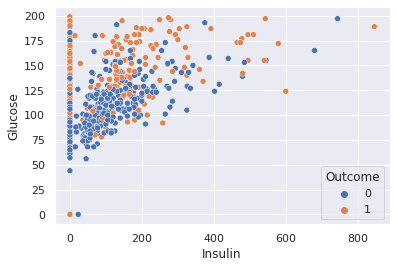

In [10]:
sns.scatterplot(x='Insulin', y='Glucose', data=df, hue='Outcome')

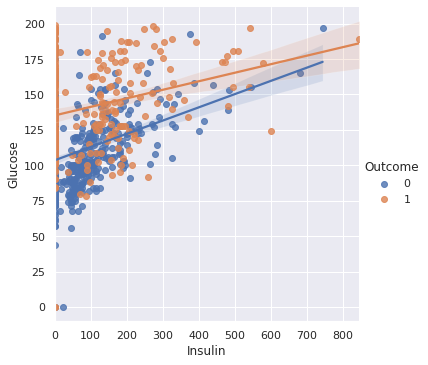

In [11]:
sns.lmplot(x='Insulin', y='Glucose', data=df, hue='Outcome')

As you can see there is a strong relation between de Insulin and Glucose, and have sense because the diabetic people that stink insulin has glocuse level very high!


### Let's see a heatmap to get a better understand of the correlation

<AxesSubplot:>

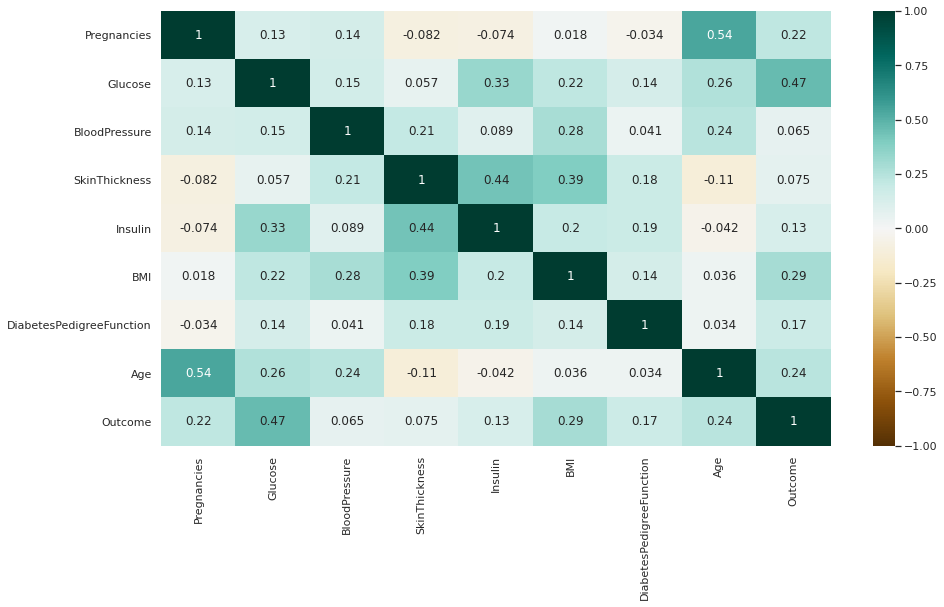

In [12]:
plt.subplots(figsize=(15, 8))

sns.heatmap(df.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

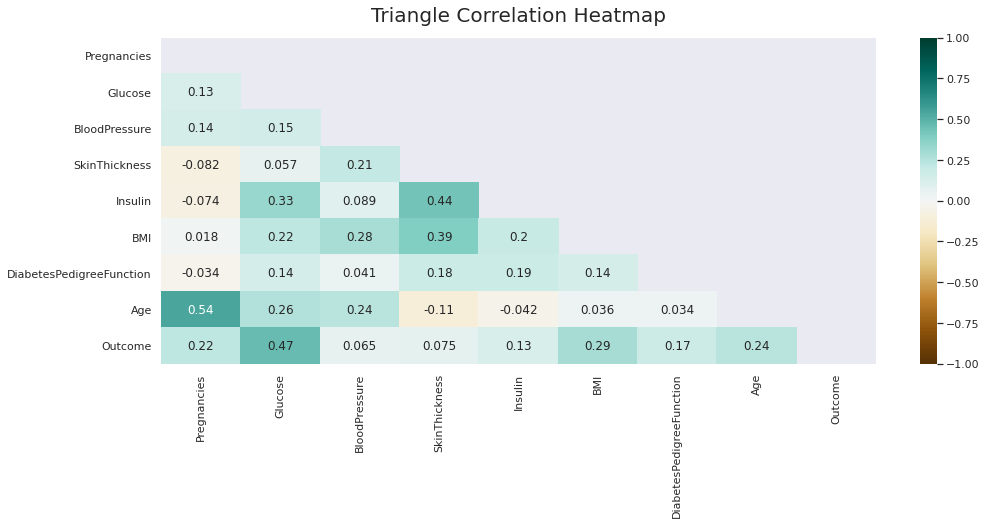

In [57]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1,
                      vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize': 20}, pad=16)

There is a strong relation between Skin thickness and Insulin and make sense, we can say that people with heigh Skin thickness will have high levels of Insuline.

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

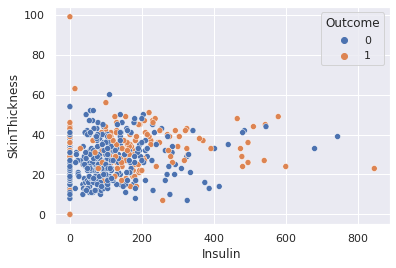

In [14]:
sns.scatterplot(x='Insulin', y='SkinThickness', data=df, hue='Outcome')

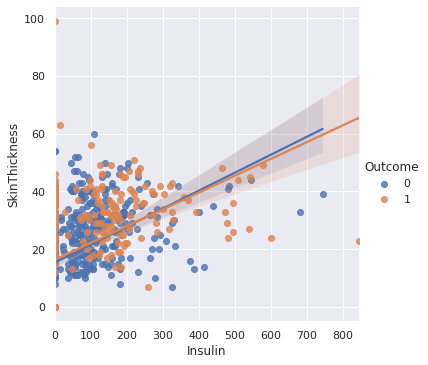

In [15]:
sns.lmplot(x='Insulin', y='SkinThickness', data=df, hue='Outcome')

## Splitting data

We are going to split our dataset into training set (80%) and test set (20%)!

In [24]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, -1].values

In [25]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [26]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,0
4,1


In [27]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)

To get better results we are going to scale our data!

In [28]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [29]:
# Tensorflow Neuronal Network

units = 35
drop = 0.3


# Initializing ANN
classifier = Sequential()

# Input layer of inputs nodes
classifier.add(
    Dense(units=units, kernel_initializer="uniform",
          activation="relu", input_dim=8)
)
classifier.add(Dropout(rate=drop))
classifier.add(
    Dense(units=units, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=drop))
classifier.add(
    Dense(units=units, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=drop))
classifier.add(
    Dense(units=units, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=drop))
classifier.add(
    Dense(units=units, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=drop))
classifier.add(
    Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

classifier.compile(optimizer="adamax",
                   loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

classifier.fit(x_train, y_train, batch_size=10, epochs=1000)


Epoch 1/1000
614/614 [==============================] - 3s 5ms/step - loss: 0.6892 - accuracy: 0.6303 - precision: 0.3361 - recall: 0.2063
Epoch 2/1000
614/614 [==============================] - 0s 144us/step - loss: 0.6726 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0456
Epoch 3/1000
614/614 [==============================] - 0s 144us/step - loss: 0.5806 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0267
Epoch 4/1000
614/614 [==============================] - 0s 152us/step - loss: 0.5369 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0188
Epoch 5/1000
614/614 [==============================] - 0s 151us/step - loss: 0.5240 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0146
Epoch 6/1000
614/614 [==============================] - 0s 146us/step - loss: 0.5217 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0120
Epoch 7/1000
614/614 [==============================] - 0s 151us/step - loss: 0.5214 - accuracy: 0.6531 - precision: 0.3333 - recall: 0.0101
Epoch 8/1000
61

614/614 [==============================] - 0s 152us/step - loss: 0.4508 - accuracy: 0.7883 - precision: 0.7210 - recall: 0.5447
Epoch 59/1000
614/614 [==============================] - 0s 151us/step - loss: 0.4469 - accuracy: 0.7980 - precision: 0.7217 - recall: 0.5453
Epoch 60/1000
614/614 [==============================] - 0s 153us/step - loss: 0.4546 - accuracy: 0.7948 - precision: 0.7226 - recall: 0.5462
Epoch 61/1000
614/614 [==============================] - 0s 153us/step - loss: 0.4468 - accuracy: 0.7964 - precision: 0.7231 - recall: 0.5468
Epoch 62/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4617 - accuracy: 0.8013 - precision: 0.7240 - recall: 0.5478
Epoch 63/1000
614/614 [==============================] - 0s 151us/step - loss: 0.4527 - accuracy: 0.7883 - precision: 0.7248 - recall: 0.5488
Epoch 64/1000
614/614 [==============================] - 0s 157us/step - loss: 0.4505 - accuracy: 0.8160 - precision: 0.7255 - recall: 0.5498
Epoch 65/1000
614/61

614/614 [==============================] - 0s 152us/step - loss: 0.4412 - accuracy: 0.8094 - precision: 0.7537 - recall: 0.5692
Epoch 116/1000
614/614 [==============================] - 0s 154us/step - loss: 0.4513 - accuracy: 0.8111 - precision: 0.7542 - recall: 0.5695
Epoch 117/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4313 - accuracy: 0.8029 - precision: 0.7545 - recall: 0.5697
Epoch 118/1000
614/614 [==============================] - 0s 151us/step - loss: 0.4340 - accuracy: 0.8094 - precision: 0.7549 - recall: 0.5697
Epoch 119/1000
614/614 [==============================] - 0s 152us/step - loss: 0.4221 - accuracy: 0.8143 - precision: 0.7555 - recall: 0.5701
Epoch 120/1000
614/614 [==============================] - 0s 151us/step - loss: 0.4269 - accuracy: 0.8094 - precision: 0.7558 - recall: 0.5702
Epoch 121/1000
614/614 [==============================] - 0s 148us/step - loss: 0.4235 - accuracy: 0.8143 - precision: 0.7563 - recall: 0.5705
Epoch 122/1000

614/614 [==============================] - 0s 150us/step - loss: 0.4242 - accuracy: 0.8176 - precision: 0.7736 - recall: 0.5786
Epoch 173/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4197 - accuracy: 0.8208 - precision: 0.7740 - recall: 0.5786
Epoch 174/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4269 - accuracy: 0.8208 - precision: 0.7743 - recall: 0.5789
Epoch 175/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4100 - accuracy: 0.8208 - precision: 0.7745 - recall: 0.5790
Epoch 176/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4195 - accuracy: 0.8176 - precision: 0.7750 - recall: 0.5792
Epoch 177/1000
614/614 [==============================] - 0s 151us/step - loss: 0.4353 - accuracy: 0.8208 - precision: 0.7754 - recall: 0.5792
Epoch 178/1000
614/614 [==============================] - 0s 146us/step - loss: 0.4140 - accuracy: 0.8225 - precision: 0.7756 - recall: 0.5796
Epoch 179/1000

614/614 [==============================] - 0s 152us/step - loss: 0.4238 - accuracy: 0.8176 - precision: 0.7880 - recall: 0.5874
Epoch 230/1000
614/614 [==============================] - 0s 153us/step - loss: 0.4184 - accuracy: 0.8241 - precision: 0.7881 - recall: 0.5875
Epoch 231/1000
614/614 [==============================] - 0s 154us/step - loss: 0.4192 - accuracy: 0.8290 - precision: 0.7883 - recall: 0.5876
Epoch 232/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4069 - accuracy: 0.8257 - precision: 0.7885 - recall: 0.5877
Epoch 233/1000
614/614 [==============================] - 0s 148us/step - loss: 0.4085 - accuracy: 0.8192 - precision: 0.7887 - recall: 0.5880
Epoch 234/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4148 - accuracy: 0.8274 - precision: 0.7888 - recall: 0.5882
Epoch 235/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4117 - accuracy: 0.8274 - precision: 0.7891 - recall: 0.5883
Epoch 236/1000

614/614 [==============================] - 0s 149us/step - loss: 0.4133 - accuracy: 0.8306 - precision: 0.7975 - recall: 0.5965
Epoch 287/1000
614/614 [==============================] - 0s 149us/step - loss: 0.4110 - accuracy: 0.8339 - precision: 0.7976 - recall: 0.5966
Epoch 288/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4166 - accuracy: 0.8274 - precision: 0.7978 - recall: 0.5968
Epoch 289/1000
614/614 [==============================] - 0s 145us/step - loss: 0.4017 - accuracy: 0.8371 - precision: 0.7979 - recall: 0.5970
Epoch 290/1000
614/614 [==============================] - 0s 147us/step - loss: 0.4073 - accuracy: 0.8306 - precision: 0.7980 - recall: 0.5971
Epoch 291/1000
614/614 [==============================] - 0s 145us/step - loss: 0.4063 - accuracy: 0.8306 - precision: 0.7982 - recall: 0.5973
Epoch 292/1000
614/614 [==============================] - 0s 148us/step - loss: 0.4076 - accuracy: 0.8404 - precision: 0.7982 - recall: 0.5975
Epoch 293/1000

614/614 [==============================] - 0s 145us/step - loss: 0.4022 - accuracy: 0.8290 - precision: 0.8041 - recall: 0.6042
Epoch 344/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3984 - accuracy: 0.8371 - precision: 0.8042 - recall: 0.6044
Epoch 345/1000
614/614 [==============================] - 0s 160us/step - loss: 0.4039 - accuracy: 0.8388 - precision: 0.8043 - recall: 0.6046
Epoch 346/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3968 - accuracy: 0.8306 - precision: 0.8043 - recall: 0.6048
Epoch 347/1000
614/614 [==============================] - 0s 150us/step - loss: 0.4051 - accuracy: 0.8339 - precision: 0.8044 - recall: 0.6048
Epoch 348/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3895 - accuracy: 0.8339 - precision: 0.8046 - recall: 0.6049
Epoch 349/1000
614/614 [==============================] - 0s 155us/step - loss: 0.3996 - accuracy: 0.8420 - precision: 0.8047 - recall: 0.6051
Epoch 350/1000

614/614 [==============================] - 0s 150us/step - loss: 0.3829 - accuracy: 0.8453 - precision: 0.8096 - recall: 0.6113
Epoch 401/1000
614/614 [==============================] - 0s 153us/step - loss: 0.4001 - accuracy: 0.8257 - precision: 0.8096 - recall: 0.6114
Epoch 402/1000
614/614 [==============================] - 0s 146us/step - loss: 0.3855 - accuracy: 0.8355 - precision: 0.8097 - recall: 0.6115
Epoch 403/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3838 - accuracy: 0.8453 - precision: 0.8098 - recall: 0.6117
Epoch 404/1000
614/614 [==============================] - 0s 150us/step - loss: 0.3925 - accuracy: 0.8339 - precision: 0.8099 - recall: 0.6118
Epoch 405/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3914 - accuracy: 0.8355 - precision: 0.8099 - recall: 0.6119
Epoch 406/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3967 - accuracy: 0.8322 - precision: 0.8099 - recall: 0.6120
Epoch 407/1000

614/614 [==============================] - 0s 148us/step - loss: 0.3922 - accuracy: 0.8339 - precision: 0.8118 - recall: 0.6191
Epoch 458/1000
614/614 [==============================] - 0s 150us/step - loss: 0.3976 - accuracy: 0.8371 - precision: 0.8119 - recall: 0.6193
Epoch 459/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3843 - accuracy: 0.8322 - precision: 0.8118 - recall: 0.6194
Epoch 460/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3824 - accuracy: 0.8436 - precision: 0.8119 - recall: 0.6195
Epoch 461/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3836 - accuracy: 0.8453 - precision: 0.8119 - recall: 0.6196
Epoch 462/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3780 - accuracy: 0.8436 - precision: 0.8120 - recall: 0.6198
Epoch 463/1000
614/614 [==============================] - 0s 155us/step - loss: 0.3943 - accuracy: 0.8355 - precision: 0.8120 - recall: 0.6199
Epoch 464/1000

614/614 [==============================] - 0s 154us/step - loss: 0.3791 - accuracy: 0.8534 - precision: 0.8122 - recall: 0.6282
Epoch 515/1000
614/614 [==============================] - 0s 153us/step - loss: 0.3916 - accuracy: 0.8371 - precision: 0.8121 - recall: 0.6284
Epoch 516/1000
614/614 [==============================] - 0s 154us/step - loss: 0.3878 - accuracy: 0.8453 - precision: 0.8121 - recall: 0.6285
Epoch 517/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3866 - accuracy: 0.8388 - precision: 0.8122 - recall: 0.6286
Epoch 518/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3819 - accuracy: 0.8485 - precision: 0.8122 - recall: 0.6288
Epoch 519/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3898 - accuracy: 0.8485 - precision: 0.8122 - recall: 0.6290
Epoch 520/1000
614/614 [==============================] - 0s 143us/step - loss: 0.3844 - accuracy: 0.8485 - precision: 0.8122 - recall: 0.6291
Epoch 521/1000

614/614 [==============================] - 0s 149us/step - loss: 0.3864 - accuracy: 0.8534 - precision: 0.8118 - recall: 0.6376
Epoch 572/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3719 - accuracy: 0.8518 - precision: 0.8119 - recall: 0.6378
Epoch 573/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3770 - accuracy: 0.8355 - precision: 0.8119 - recall: 0.6379
Epoch 574/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3794 - accuracy: 0.8453 - precision: 0.8118 - recall: 0.6381
Epoch 575/1000
614/614 [==============================] - 0s 150us/step - loss: 0.3924 - accuracy: 0.8371 - precision: 0.8118 - recall: 0.6382
Epoch 576/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3832 - accuracy: 0.8371 - precision: 0.8118 - recall: 0.6384
Epoch 577/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3753 - accuracy: 0.8583 - precision: 0.8118 - recall: 0.6385
Epoch 578/1000

614/614 [==============================] - 0s 152us/step - loss: 0.3804 - accuracy: 0.8241 - precision: 0.8109 - recall: 0.6474
Epoch 629/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3933 - accuracy: 0.8404 - precision: 0.8109 - recall: 0.6477
Epoch 630/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3502 - accuracy: 0.8534 - precision: 0.8109 - recall: 0.6478
Epoch 631/1000
614/614 [==============================] - 0s 145us/step - loss: 0.3564 - accuracy: 0.8681 - precision: 0.8109 - recall: 0.6480
Epoch 632/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3620 - accuracy: 0.8583 - precision: 0.8109 - recall: 0.6481
Epoch 633/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3613 - accuracy: 0.8502 - precision: 0.8109 - recall: 0.6483
Epoch 634/1000
614/614 [==============================] - 0s 153us/step - loss: 0.3744 - accuracy: 0.8567 - precision: 0.8109 - recall: 0.6485
Epoch 635/1000

614/614 [==============================] - 0s 154us/step - loss: 0.3800 - accuracy: 0.8469 - precision: 0.8102 - recall: 0.6564
Epoch 686/1000
614/614 [==============================] - 0s 154us/step - loss: 0.3677 - accuracy: 0.8534 - precision: 0.8102 - recall: 0.6565
Epoch 687/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3748 - accuracy: 0.8485 - precision: 0.8102 - recall: 0.6567
Epoch 688/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3641 - accuracy: 0.8550 - precision: 0.8102 - recall: 0.6568
Epoch 689/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3799 - accuracy: 0.8534 - precision: 0.8102 - recall: 0.6570
Epoch 690/1000
614/614 [==============================] - 0s 157us/step - loss: 0.3526 - accuracy: 0.8762 - precision: 0.8102 - recall: 0.6572
Epoch 691/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3713 - accuracy: 0.8567 - precision: 0.8102 - recall: 0.6573
Epoch 692/1000

614/614 [==============================] - 0s 149us/step - loss: 0.3486 - accuracy: 0.8599 - precision: 0.8098 - recall: 0.6647
Epoch 743/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3895 - accuracy: 0.8355 - precision: 0.8098 - recall: 0.6648
Epoch 744/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3679 - accuracy: 0.8599 - precision: 0.8098 - recall: 0.6650
Epoch 745/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3597 - accuracy: 0.8616 - precision: 0.8098 - recall: 0.6651
Epoch 746/1000
614/614 [==============================] - 0s 150us/step - loss: 0.3692 - accuracy: 0.8567 - precision: 0.8098 - recall: 0.6653
Epoch 747/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3533 - accuracy: 0.8616 - precision: 0.8098 - recall: 0.6654
Epoch 748/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3458 - accuracy: 0.8697 - precision: 0.8098 - recall: 0.6655
Epoch 749/1000

614/614 [==============================] - 0s 150us/step - loss: 0.3638 - accuracy: 0.8616 - precision: 0.8102 - recall: 0.6725
Epoch 800/1000
614/614 [==============================] - 0s 147us/step - loss: 0.3596 - accuracy: 0.8550 - precision: 0.8102 - recall: 0.6726
Epoch 801/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3649 - accuracy: 0.8583 - precision: 0.8102 - recall: 0.6727
Epoch 802/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3679 - accuracy: 0.8550 - precision: 0.8102 - recall: 0.6729
Epoch 803/1000
614/614 [==============================] - 0s 150us/step - loss: 0.3571 - accuracy: 0.8632 - precision: 0.8102 - recall: 0.6730
Epoch 804/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3686 - accuracy: 0.8583 - precision: 0.8102 - recall: 0.6731
Epoch 805/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3735 - accuracy: 0.8567 - precision: 0.8102 - recall: 0.6732
Epoch 806/1000

614/614 [==============================] - 0s 150us/step - loss: 0.3677 - accuracy: 0.8534 - precision: 0.8103 - recall: 0.6800
Epoch 857/1000
614/614 [==============================] - 0s 158us/step - loss: 0.3709 - accuracy: 0.8534 - precision: 0.8102 - recall: 0.6801
Epoch 858/1000
614/614 [==============================] - 0s 155us/step - loss: 0.3629 - accuracy: 0.8599 - precision: 0.8102 - recall: 0.6802
Epoch 859/1000
614/614 [==============================] - 0s 156us/step - loss: 0.3820 - accuracy: 0.8469 - precision: 0.8102 - recall: 0.6803
Epoch 860/1000
614/614 [==============================] - 0s 154us/step - loss: 0.3567 - accuracy: 0.8616 - precision: 0.8102 - recall: 0.6804
Epoch 861/1000
614/614 [==============================] - 0s 162us/step - loss: 0.3768 - accuracy: 0.8616 - precision: 0.8102 - recall: 0.6805
Epoch 862/1000
614/614 [==============================] - 0s 153us/step - loss: 0.3668 - accuracy: 0.8485 - precision: 0.8102 - recall: 0.6806
Epoch 863/1000

614/614 [==============================] - 0s 155us/step - loss: 0.3740 - accuracy: 0.8518 - precision: 0.8103 - recall: 0.6865
Epoch 914/1000
614/614 [==============================] - 0s 146us/step - loss: 0.3563 - accuracy: 0.8746 - precision: 0.8103 - recall: 0.6866
Epoch 915/1000
614/614 [==============================] - 0s 154us/step - loss: 0.3341 - accuracy: 0.8730 - precision: 0.8103 - recall: 0.6867
Epoch 916/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3579 - accuracy: 0.8648 - precision: 0.8103 - recall: 0.6868
Epoch 917/1000
614/614 [==============================] - 0s 154us/step - loss: 0.3701 - accuracy: 0.8583 - precision: 0.8103 - recall: 0.6869
Epoch 918/1000
614/614 [==============================] - 0s 152us/step - loss: 0.3473 - accuracy: 0.8713 - precision: 0.8103 - recall: 0.6871
Epoch 919/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3504 - accuracy: 0.8664 - precision: 0.8103 - recall: 0.6872
Epoch 920/1000

614/614 [==============================] - 0s 152us/step - loss: 0.3329 - accuracy: 0.8746 - precision: 0.8109 - recall: 0.6928
Epoch 971/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3609 - accuracy: 0.8567 - precision: 0.8110 - recall: 0.6928
Epoch 972/1000
614/614 [==============================] - 0s 149us/step - loss: 0.3519 - accuracy: 0.8648 - precision: 0.8110 - recall: 0.6929
Epoch 973/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3446 - accuracy: 0.8664 - precision: 0.8110 - recall: 0.6930
Epoch 974/1000
614/614 [==============================] - 0s 151us/step - loss: 0.3483 - accuracy: 0.8730 - precision: 0.8110 - recall: 0.6931
Epoch 975/1000
614/614 [==============================] - 0s 153us/step - loss: 0.3519 - accuracy: 0.8664 - precision: 0.8110 - recall: 0.6932
Epoch 976/1000
614/614 [==============================] - 0s 148us/step - loss: 0.3340 - accuracy: 0.8779 - precision: 0.8110 - recall: 0.6933
Epoch 977/1000

## Nice :D!, we got an accuracy around 89%!, Let's see the summary and the report!

In [30]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                315       
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1260      
_________________________________________________________________
dropout_2 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1260      
_________________________________________________________________
dropout_3 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 35)               

It is very important to save your Tensorflow model into a file to import it later. For example you have a Flask python backend using Docker and just import your model and use it in the endpoint!


Also dump your scaler model to always scale with the same values your new input prediction values!

In [31]:
classifier.save("diabetes_deep_learning_model.hd5")
joblib.dump(sc, "std_scaler.bin", compress=True)
y_pred = classifier.predict(x_test)

In [32]:
y_pred

array([[8.06752563e-01],
       [1.33853272e-01],
       [1.15064651e-01],
       [5.33415824e-02],
       [9.00278762e-02],
       [1.54167101e-01],
       [8.43174875e-01],
       [1.48542058e-02],
       [9.49852169e-02],
       [9.12566707e-02],
       [7.44142056e-01],
       [7.98002556e-02],
       [8.51292729e-01],
       [8.49653840e-01],
       [5.10498183e-03],
       [8.50554764e-01],
       [6.36052608e-01],
       [1.87061444e-01],
       [1.31455464e-02],
       [9.33462754e-02],
       [4.77577150e-01],
       [1.56940401e-01],
       [8.28446329e-01],
       [1.53498024e-01],
       [1.39415842e-02],
       [8.72575939e-01],
       [1.11644678e-01],
       [8.57519031e-01],
       [2.08599903e-02],
       [1.60924777e-01],
       [1.36828348e-01],
       [1.04708157e-01],
       [1.15271602e-02],
       [6.63051426e-01],
       [1.30596504e-01],
       [2.75427818e-01],
       [4.86216210e-02],
       [1.45626426e-01],
       [6.42810911e-02],
       [2.64083952e-01],


We can say that the new prediction grather than 0.5 is Positive and less than 0.5 is Negative!

In [33]:
y_pred_prod = classifier.predict_proba(x_test)
y_pred = (y_pred > 0.5)

In [34]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

Let's plot the report and the confussion matrix to have a better look of our predictions!

In [35]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



In [44]:
print("Confusion Matrix for our NN \n")
print(cm)
print()
print("Report")
print(report)
print()
print("Score")
print(score)

Confusion Matrix for our NN 

[[84 15]
 [20 35]]

Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154


Score
0.7727272727272727


## Results!
We can say that our NN has great results!


But what happens if we compare it with another machine learning model, let's see!

We are going to use Naive Bayes to compare it with our NN

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_model = gnb.fit(x_train, y_train)


In [40]:
y_pred_nb = nb_model.predict(x_test)

In [41]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

score_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [51]:
print("Confusion Matrix for Naive Bayes \n")
print(cm_nb)
print()
print("Report")
print(report_nb)
print()
print("Score")
print(score_nb)

Confusion Matrix for Naive Bayes 

[[85 14]
 [21 34]]

Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154


Score
0.7727272727272727


Our NN and Naive bayes perform almost the same results, so in summary we can use both of them to perform this problem and use it to the future.!

Let's see another machine learning models, how the perform this problem of binary classification!

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [47]:
y_pred_tree = clf.predict(x_test)

In [48]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
score_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

In [50]:
print("Confusion Matrix for Decision Tree \n")
print(cm_tree)
print()
print("Report")
print(report_tree)
print()
print("Score")
print(score_tree)

Confusion Matrix for Decision Tree 

[[75 24]
 [28 27]]

Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        99
           1       0.53      0.49      0.51        55

    accuracy                           0.66       154
   macro avg       0.63      0.62      0.63       154
weighted avg       0.66      0.66      0.66       154


Score
0.6623376623376623


In [52]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [53]:
y_pred_svm = clf.predict(x_test)

In [54]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
score_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)


In [55]:
print("Confusion Matrix for SVM \n")
print(cm_svm)
print()
print("Report")
print(report_svm)
print()
print("Score")
print(score_svm)

Confusion Matrix for SVM 

[[92  7]
 [23 32]]

Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.82      0.58      0.68        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154


Score
0.8051948051948052


## Loading our model files

In [58]:
diabetes_model = tf.keras.models.load_model("./diabetes_deep_learning_model.hd5")
sc = joblib.load("./std_scaler.bin")


[2021-09-23 04:29:38.363 ip-172-16-76-171:13639 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-09-23 04:29:38.657 ip-172-16-76-171:13639 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


## Predicting new patient!

In [66]:
new_prediction = diabetes_model.predict(
    sc.transform(
        np.array(
            [[3, 180.0, 90, 35, 0, 33.6, 0.627, 50.0]]
        )
    )
)


In [67]:
new_prediction.item()


0.8671181797981262

This patient has a probability of 86.71% is diabetic !